In [1]:
# Step 1: Load libraries and import data

import pandas as pd
import statsmodels.api as sm

# for certain versions of jupyter:
%matplotlib inline

In [20]:
url = (
    "https://raw.githubusercontent.com/LOST-STATS/LOST-STATS"
    ".github.io/master/Model_Estimation/Data/"
    "Two_by_Two_Difference_in_Difference/did_crime.xlsx"
)

df = pd.read_excel(url)

In [26]:
df

,murder,treat,year,after,treatafter
0,4.820000,1,2000,False,0
1,4.665700,1,2001,False,0
2,5.312503,1,2002,False,0
3,5.016756,1,2003,False,0
4,5.534846,1,2004,False,0
5,4.823599,1,2005,False,0
6,4.965448,1,2006,False,0
7,4.235205,1,2007,False,0
8,4.622827,1,2008,False,0
9,4.406904,1,2009,False,0


In [21]:
df['after'] = df['year'] >= 2014

In [22]:
df.head()

,murder,treat,year,after
0,4.820000,1,2000,False
1,4.665700,1,2001,False
2,5.312503,1,2002,False
3,5.016756,1,2003,False
4,5.534846,1,2004,False


In [23]:
# Step 2: indicator variables 

# whether treatment has occured at all
df['after'] = df['year'] >= 2014
# whether it has occurred to this entity
df['treatafter'] = df['after'] * df['treat']

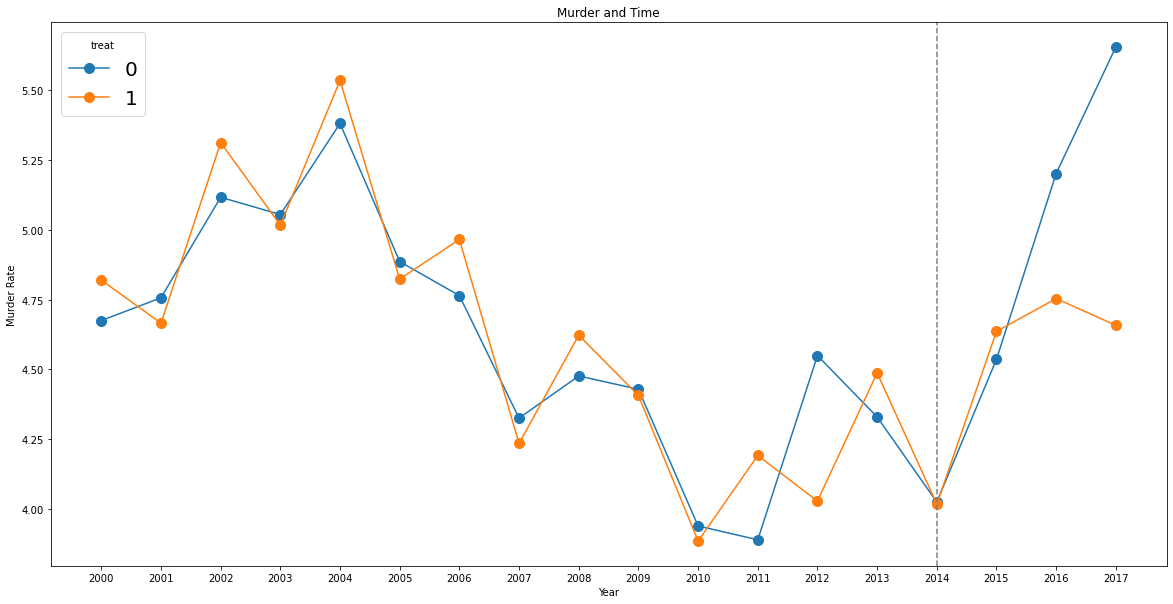

In [24]:
# Step 3:

# use pandas basic built in plot functionality to get a visual
# perspective of our parallel trends assumption
ax = df.pivot(index='year', columns='treat', values='murder').plot(
    figsize=(20, 10),
    marker='.', 
    markersize=20, 
    title='Murder and Time',
    xlabel='Year',
    ylabel='Murder Rate',
    # to make sure each year is displayed on axis
    xticks=df['year'].drop_duplicates().sort_values().astype('int')
)
# the function returns a matplotlib.pyplot.Axes object 
# we can use this axis to add additional decoration to our plot
ax.axvline(x=2014, color='gray', linestyle='--') # treatment year
ax.legend(loc='upper left', title='treat', prop={'size': 20}) # move and label legend

In [25]:
# Step 4:

# statsmodels has two separate APIs
# the original API is more complete both in terms of functionality and documentation
X = sm.add_constant(df[['treat', 'treatafter', 'after']].astype('float'))
y = df['murder']
sm_fit = sm.OLS(y, X).fit()

# the formula API is more familiar for R users 
# it can be accessed through an alternate constructor bound to each model class
smff_fit = sm.OLS.from_formula('murder ~ 1 + treat + treatafter + after', data=df).fit()

# it can also be accessed through a separate namespace
import statsmodels.formula.api as smf
smf_fit = smf.ols('murder ~ 1 + treat + treatafter + after', data=df).fit()

# if using jupyter, rich output is displayed without the print function
# we should see three identical outputs
print(sm_fit.summary())
print(smff_fit.summary())
print(smf_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 murder   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                    0.3791
Date:                Tue, 21 Sep 2021   Prob (F-statistic):              0.769
Time:                        13:24:57   Log-Likelihood:                -22.107
No. Observations:                  36   AIC:                             52.21
Df Residuals:                      32   BIC:                             58.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6125      0.127     36.389      0.0